In [1]:
import warnings 
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns 
import os
 

import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import matplotlib.lines as mlines


In [2]:
# define path
base_path = os.path.dirname(os.getcwd())

# get turku data for plotting 
corrs_turku = dict(np.load(os.path.join(base_path, 'data', 'corrs_turku.npz')))
corrs_turku = pd.DataFrame(corrs_turku).transpose()
corrs_turku.columns = ['rho', 'pspin']
nulls_turku = dict(np.load(os.path.join(base_path, 'data', 'nulls_turku.npz')))

# get enigma data for plotting
corrs_enigma= dict(np.load(os.path.join(base_path, 'data' ,'corrs_enigma.npz')))
corrs_enigma = pd.DataFrame(corrs_enigma).transpose()
corrs_enigma.columns = ['rho', 'pspin']
nulls_enigma = dict(np.load(os.path.join(base_path, 'data', 'nulls_enigma.npz')))

# relabeling etc 
target_labels = pd.read_csv(os.path.join(base_path, 'data', 'target_labels.csv'))
alt_target_labels = pd.read_csv(os.path.join(base_path, 'data', 'alt_target_labels.csv'))

In [3]:
# merge source labels etc for plotting and results 
df_turku = pd.merge(target_labels, corrs_turku, left_on='source', right_index=True)

# do multiple comparisons correction
_, fdr_corrected_pvalues, _, _ = multipletests(df_turku['pspin'], alpha=0.05, method='fdr_bh')
df_turku['fdr_corrected_p_value'] = fdr_corrected_pvalues

# show 
display(df_turku)

# save
df_turku.to_csv(os.path.join(base_path, 'tables', 'correlations_in_discovery_sample.csv'), index=False)

,source,class,target,rho,pspin,fdr_corrected_p_value
0,kaller2017_sch23390,dopamine,D1,-0.136113,0.252275,0.312821
1,jaworska2020_fallypride,dopamine,D2,-0.151458,0.164884,0.212975
2,beliveau2017_dasb,serotonin,5-HTT,-0.404191,0.001800,0.007971
3,savli2012_way100635,serotonin,5-HT1A,-0.223089,0.067293,0.109794
4,beliveau2017_az10419369,serotonin,5-HT1B,0.198970,0.109589,0.147707
5,beliveau2017_cimbi36,serotonin,5-HT2A,0.377866,0.001200,0.007439
6,beliveau2017_sb207145,serotonin,5-HT4,0.275148,0.018998,0.036809
7,radnakrishnan2018_gsk215083,serotonin,5-HT6,0.064869,0.593041,0.633940
8,tuominen_feobv,acetylcholine,vAChT,-0.321012,0.006299,0.017753
9,hillmer2016_flubatine,acetylcholine,$\alpha4 \beta2*$,0.366287,0.004900,0.015498


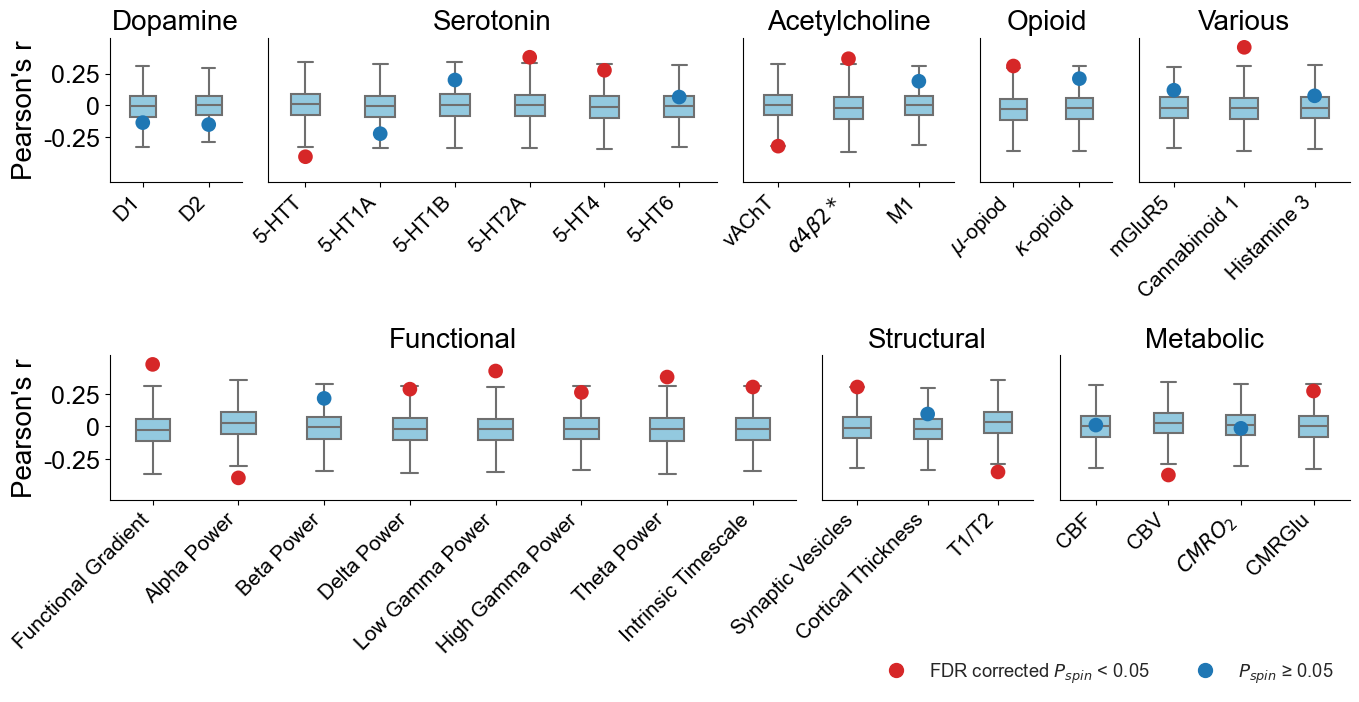

In [4]:
#plt 
# make subplots in this order  
plot_order = ['dopamine', 'serotonin', 'acetylcholine','opioid', 'various',
               'functional', 'structural', 'metabolic']

fig = plt.figure(figsize=(16,6))
gs = fig.add_gridspec(2, 16, hspace=1.2, wspace=0.5)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

f_ax1 = fig.add_subplot(gs[0, 0:2]) # dopamine
f_ax2 = fig.add_subplot(gs[0, 2:8], sharey=f_ax1) # 5-HT
f_ax3 = fig.add_subplot(gs[0, 8:11], sharey=f_ax1) # ACh
f_ax4 = fig.add_subplot(gs[0, 11:13], sharey=f_ax1) # Opioid
f_ax5 = fig.add_subplot(gs[0, 13:], sharey=f_ax1) # Various

f_ax6 = fig.add_subplot(gs[1, 0:9]) # functional
f_ax7 = fig.add_subplot(gs[1, 9:12], sharey=f_ax6) # structural
f_ax8 = fig.add_subplot(gs[1, 12:], sharey=f_ax6) # metabolic

sns.set(font_scale=1.2)
sns.set_style('whitegrid')

for i,ax in enumerate(fig.get_axes()):
    corrs = df_turku[df_turku['class'] == plot_order[i]]
    nulls = pd.DataFrame(np.column_stack([nulls_turku.get(s) for s in corrs['source']]))
    nulls.columns = list(corrs['source'])

    color = ((corrs['pspin'] > 0.05).astype(int)).tolist()
    color = [(0.839, 0.152, 0.156) if c == 0 else (0.121, 0.466, 0.705) for c in color]
    
    x = np.arange(corrs.shape[0])
    cpalette = dict(zip(x, color))
    
    ax1 = sns.boxplot(data=nulls, width=0.4, fliersize=0, color ='skyblue', ax=ax);
    ax2 = sns.pointplot(x=x,
                  y=corrs['rho'],
                  palette=cpalette,
                  join = False , 
                  scale=1.2,
                  ax=ax1);

    # make pretty
    children1 = ax1.get_children()
    children2 = ax2.get_children()

    # Set the zorder of the children of the boxplot to 1
    for child in children1:
        child.set_zorder(10)

    # Set the zorder of the children of the pointplot to 2
    for child in children2:
        child.set_zorder(20)

    ax1.set_axisbelow(True)
    
    ax1.set_title(plot_order[i].capitalize(), fontsize=20)
    if i in [0,5]:
        ax1.set(yticks=[-.25, 0, .25])
        ax1.set_yticklabels([ '-0.25', '0', '0.25'], fontsize=30)
        ax1.set_ylabel("Pearson's r", fontsize=20)
        ax1.tick_params(axis='y', labelsize=18)
    else:
        ax1.tick_params(axis='y', which='both', length=0, labelleft=False)
        ax1.set_ylabel(None)
        ax1.spines['left'].set_visible(True)
        
    ax1.set_xticklabels(list(corrs['target']), rotation=45, ha="right", fontsize=15)
    
# legend
blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='FDR corrected $P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05' )

plt.legend(handles=[blue_circle, red_circle], frameon=False, bbox_to_anchor=(1, -1), ncol=2);

plt.savefig(os.path.join(base_path, 'figures' ,'Figure2.jpg'), bbox_inches='tight', dpi=300) 

In [6]:
# show alternative 
df_turku_alt = pd.merge(alt_target_labels, corrs_turku, left_on='source', right_index=True)
display(df_turku_alt)

# save table
df_turku_alt.to_csv(os.path.join(base_path, 'tables', 'alternative_tracers_discovery_sample.csv'), index=False)

                    

,source,class,target,rho,pspin
0,sandiego2015_flb457,dopamine,D2,-0.000058,0.999600
1,fazio2016_madam,serotonin,5-HTT,-0.340886,0.004100
2,beliveau2017_cumi101,serotonin,5-HT1A,-0.031009,0.792221
3,savli2012_p943,serotonin,5-HT1B,0.176320,0.138986
4,savli2012_altanserin,serotonin,5-HT2A,0.036385,0.738126
5,normandin2015_omar,various,Cannabinoid 1,0.344504,0.005099


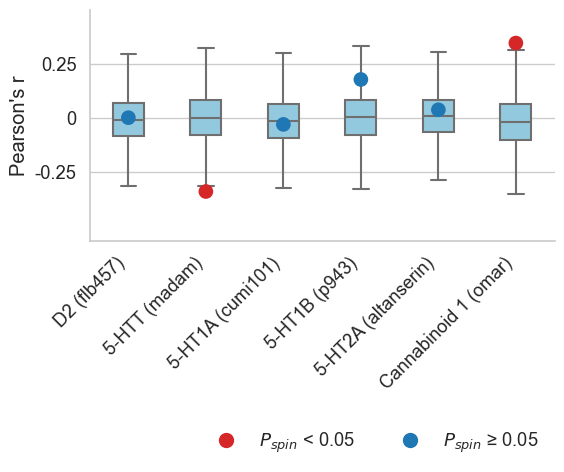

In [7]:
# plot alternative 
df_turku_alt['xlabel'] = df_turku_alt['target'] + ' (' + [s.split('_')[1] for s in df_turku_alt['source']]  + ')' # labels
nulls = pd.DataFrame(np.column_stack([nulls_turku.get(s) for s in df_turku_alt['source']]))
nulls.columns = list(df_turku_alt['source'])

color = ((df_turku_alt['pspin'] > 0.05).astype(int)).tolist()
color = [(0.839, 0.152, 0.156) if c == 0 else (0.121, 0.466, 0.705) for c in color]

x = np.arange(df_turku_alt.shape[0])
cpalette = dict(zip(x, color))
    
fig = plt.figure(figsize=(6,3))
sns.set_style('whitegrid')

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

ax1 = sns.boxplot(data=nulls, width=0.4, fliersize=0, color ='skyblue')
ax2 = sns.pointplot(x=x,
              y=df_turku_alt['rho'],
              palette=cpalette,
              join = False , 
              scale=1.2,
              ax=ax1);

children1 = ax1.get_children()
children2 = ax2.get_children()

# Set the zorder of the children of the boxplot to 1
for child in children1:
    child.set_zorder(10)

# Set the zorder of the children of the pointplot to 2
for child in children2:
    child.set_zorder(20)

ax1.set_axisbelow(True)

ax1.set(yticks=[-.25, 0, .25], ylabel="Pearson's r")
ax1.set_yticklabels(['-0.25', '0', '0.25'])
ax1.set_xticklabels(df_turku_alt['xlabel'], rotation=45, ha='right')


blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05' )
plt.legend(handles=[blue_circle, red_circle], frameon=False, bbox_to_anchor=(1, -0.75), ncol=2);

plt.savefig(os.path.join(base_path, 'figures','Supp_Fig3.jpg'), bbox_inches='tight', dpi=300) 

            

In [8]:
# replicate in ENIGMA
replicate = df_turku[df_turku['fdr_corrected_p_value']< 0.05]['source'] # select sources 
df_enigma = corrs_enigma[corrs_enigma.index.isin(replicate)] # select enigma 
df_enigma = pd.merge(target_labels, df_enigma,  how='right', right_index=True, left_on='source') # add target labels

custom_order = {v: i for i, v in enumerate(plot_order)} # sorting order 
df_enigma = df_enigma.sort_values(by=['class'], key=lambda x: x.map(custom_order)) # sort for pretty 

functional = df_enigma[df_enigma['source'].str.contains('meg') ] # also sort meg logically
functional = functional.sort_values(by=['source'])
df_enigma = df_enigma.reset_index(drop=True)
df_enigma.iloc[8:14] = functional

# correct for multiple comparisons 
_, fdr_corrected_pvalues, _, _ = multipletests(df_enigma['pspin'], alpha=0.05, method='fdr_bh')
df_enigma['fdr_corrected_p_value'] = fdr_corrected_pvalues

display(df_enigma)

# save table
df_enigma.to_csv(os.path.join(base_path, 'tables', 'correlations_in_replication_sample.csv') , index=False)


,source,class,target,rho,pspin,fdr_corrected_p_value
0,beliveau2017_dasb,serotonin,5-HTT,-0.427301,0.000400,0.003600
1,beliveau2017_cimbi36,serotonin,5-HT2A,0.447239,0.000300,0.003600
2,beliveau2017_sb207145,serotonin,5-HT4,0.468571,0.001100,0.004950
3,hillmer2016_flubatine,acetylcholine,$\alpha4 \beta2*$,0.361201,0.002900,0.007456
4,tuominen_feobv,acetylcholine,vAChT,-0.186156,0.121388,0.138924
5,kantonen2020_carfentanil,opioid,$\mu$-opiod,0.387682,0.002600,0.007456
6,laurikainen2018_fmpepd2,various,Cannabinoid 1,0.546847,0.000600,0.003600
7,margulies2016_fcgradient01,functional,Functional Gradient,0.364822,0.006199,0.012399
8,hcps1200_megalpha,functional,Alpha Power,-0.352202,0.005399,0.012149
9,hcps1200_megdelta,functional,Delta Power,0.228598,0.082292,0.105804


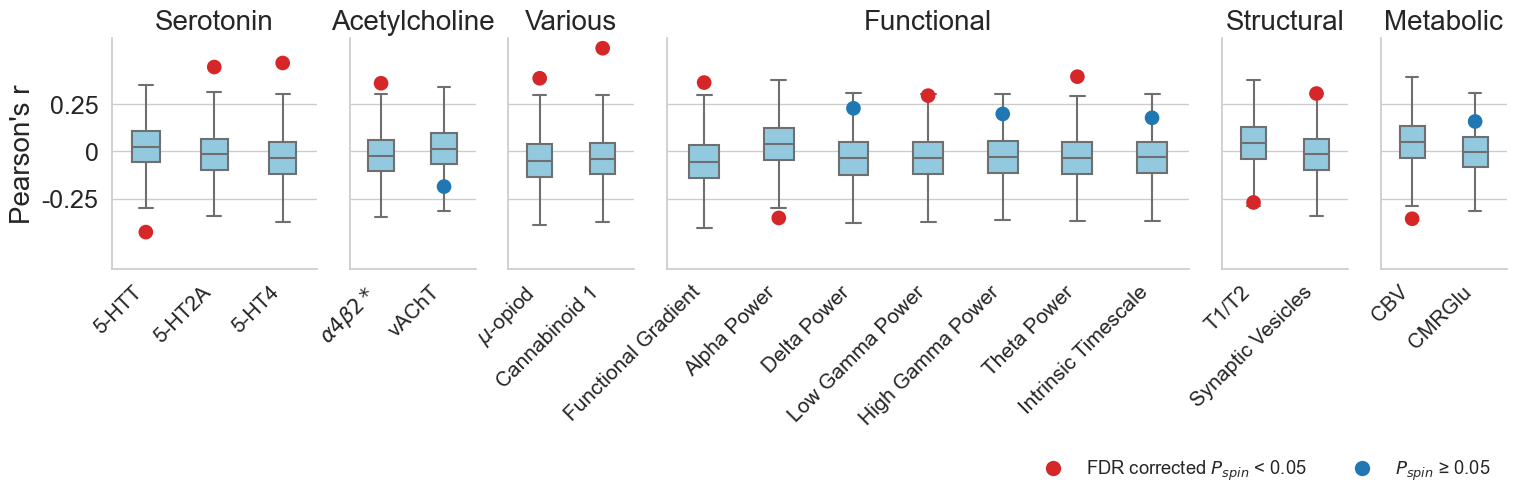

In [10]:
# plot
df_enigma['class'] = df_enigma['class'].str.replace('opioid', 'various')
plot_order = ['serotonin', 'acetylcholine', 'various',
               'functional', 'structural', 'metabolic']

fig = plt.figure(figsize=(18,3))
gs = fig.add_gridspec(1, 18, hspace=0.8, wspace=0.7)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

f_ax1 = fig.add_subplot(gs[0, 0:3]) # serotonin
f_ax2 = fig.add_subplot(gs[0, 3:5], sharey=f_ax1) # ACh
f_ax3 = fig.add_subplot(gs[0, 5:7], sharey=f_ax1) # Opioid + CB1
#f_ax4 = fig.add_subplot(gs[0, 6], sharey=f_ax1) # Various
f_ax5 = fig.add_subplot(gs[0, 7:14], sharey=f_ax1) # Various
f_ax6 = fig.add_subplot(gs[0, 14:16], sharey=f_ax1) # Structural
f_ax7 = fig.add_subplot(gs[0, 16:], sharey=f_ax1) # metabolic

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

for i,ax in enumerate(fig.get_axes()):
    corrs = df_enigma[df_enigma['class'] == plot_order[i]]
    nulls = pd.DataFrame(np.column_stack([nulls_enigma.get(s) for s in corrs['source']]))
    nulls.columns = list(corrs['source'])

    color = ((corrs['pspin'] > 0.05).astype(int)).tolist()
    color = [(0.839, 0.152, 0.156) if c == 0 else (0.121, 0.466, 0.705) for c in color]
    
    x = np.arange(corrs.shape[0])
    cpalette = dict(zip(x, color))
    
    ax1 = sns.boxplot(data=nulls, width=0.4, fliersize=0, color ='skyblue', ax=ax);
    ax2 = sns.pointplot(x=x,
                  y=corrs['rho'],
                  palette=cpalette,
                  join = False , 
                  scale=1.2,
                  ax=ax1);

    # make pretty
    children1 = ax1.get_children()
    children2 = ax2.get_children()

    # Set the zorder of the children of the boxplot to 1
    for child in children1:
        child.set_zorder(10)

    # Set the zorder of the children of the pointplot to 2
    for child in children2:
        child.set_zorder(20)

    ax1.set_axisbelow(True)
    
    ax1.set_title(plot_order[i].capitalize(), fontsize=20)
    if i in [0,7]:
        ax1.set(yticks=[-.25, 0, .25])
        ax1.set_yticklabels([ '-0.25', '0', '0.25'], fontsize=30)
        ax1.set_ylabel("Pearson's r", fontsize=20)
        ax1.tick_params(axis='y', labelsize=18)
    else:
        ax1.tick_params(axis='y', which='both', length=0, labelleft=False)
        ax1.set_ylabel(None)
        ax1.spines['left'].set_visible(True)
        
    ax1.set_xticklabels(list(corrs['target']), rotation=45, ha="right", fontsize=15)
    

blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='FDR corrected $P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05' )
plt.legend(handles=[blue_circle, red_circle], frameon=False, bbox_to_anchor=(1, -0.75), ncol=2);

plt.savefig(os.path.join(base_path, 'figures', 'Figure4.jpg'), bbox_inches='tight', dpi=300) 

